In [1]:
from ultralytics import YOLO
from utils.unet import UNET
from utils.sba6pm import Vertebra as SBA

detectModule = YOLO("models/detect/weights.pt")
segmentModule = UNET("models/segment/aWtrA5sC++.pt", "cuda:0")
measureModule = SBA

In [2]:
import torch, cv2
import numpy as np
import importlib
from utils import system, smartdisplay, dicom
importlib.reload(system)
system = system.system(detectModule, segmentModule, measureModule, "cuda:0")
dicom = dicom.DICOM("./image/27JJYP.dcm", "./image/dicom.jpg")

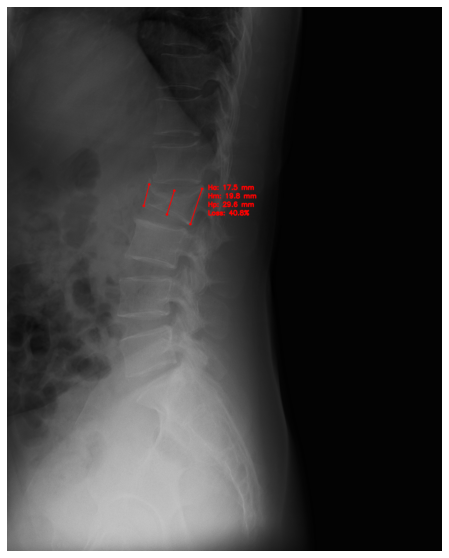

In [4]:
dicom.process()
system.assess(dicom.path_save, visualise=True)
smartdisplay.display([system.fracture], figsize=(20,10))